In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore') 
from sklearn import preprocessing
from tqdm.auto import tqdm

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.shape

(58592, 44)

In [4]:
for columns in tqdm(df.columns):
    if dict(df.dtypes)[columns] == 'object':        
        label_encoder = preprocessing.LabelEncoder()
        df[columns] = label_encoder.fit_transform(df[columns])
 

  0%|          | 0/44 [00:00<?, ?it/s]

In [5]:
from collections import Counter 
Counter(df.is_claim) 

Counter({0: 54844, 1: 3748})

<AxesSubplot:>

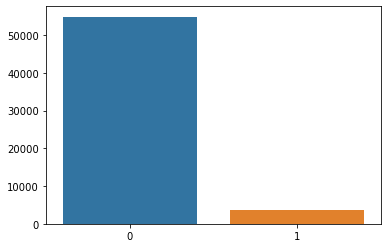

In [6]:
sns.barplot(x = [0, 1], y = [54844, 3784]) 

In [7]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  int64  
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  int64  
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  int64  
 8   model                             58592 non-null  int64  
 9   fuel_type                         58592 non-null  int64  
 10  max_torque                        58592 non-null  int64  
 11  max_power                         58592 non-null  int64  
 12  engi

In [9]:
df=df.drop(["policy_id"],axis=1)   

In [10]:
df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [11]:
y = df['is_claim']
X = df.drop(['is_claim'], axis=1)

In [12]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X, y) 
pd.Series(y_resampled).value_counts()
print(y_resampled) 

0       0
1       0
2       0
3       0
4       0
       ..
7491    1
7492    1
7493    1
7494    1
7495    1
Name: is_claim, Length: 7496, dtype: int64


In [13]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X_resampled) 
features = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating']
pd.DataFrame(x, columns=features).head() 

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,-0.824454,-0.840898,-0.182132,0.279524,-0.836104,-0.669385,0.026446,0.730504,1.186794,-1.329296,...,-0.734962,0.883951,0.614357,0.614357,0.141431,0.82209,1.269227,0.614357,0.071381,0.169401
1,-1.432805,1.904552,-0.412736,-1.509301,0.943839,-0.669385,0.026446,0.730504,1.186794,-1.329296,...,-0.734962,0.883951,0.614357,0.614357,0.141431,0.82209,1.269227,0.614357,0.071381,0.169401
2,0.221792,1.538492,-0.259000,1.024867,-0.562695,1.093070,1.309553,0.102214,-0.013612,0.321738,...,1.360615,0.883951,0.614357,0.614357,0.141431,0.82209,-0.787881,0.614357,0.071381,0.892539
3,-0.643451,1.538492,-1.335156,-0.316751,0.492522,-0.669385,0.026446,0.730504,1.186794,-1.329296,...,-0.734962,0.883951,0.614357,0.614357,0.141431,0.82209,1.269227,0.614357,0.071381,0.169401
4,1.133820,0.074252,-0.566473,1.024867,-0.562695,-0.669385,0.026446,0.730504,1.186794,-1.329296,...,-0.734962,0.883951,0.614357,0.614357,0.141431,0.82209,1.269227,0.614357,0.071381,0.169401


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
# 주성분으로 이루어진 데이터 프레임 구성

In [15]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(principalDf.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result  

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,19.383592,0.461453,0.461453
pca2,8.463310,0.201481,0.662933
pca3,2.399831,0.057131,0.720064
pca4,2.201072,0.052399,0.772464
pca5,1.516269,0.036097,0.808561
pca6,1.315742,0.031323,0.839884
pca7,1.132682,0.026965,0.866849
pca8,1.109943,0.026424,0.893272
pca9,1.038199,0.024716,0.917988
pca10,0.795739,0.018944,0.936932


In [16]:
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(principalDf, y_resampled, test_size=0.3, random_state=1)
pd.Series(train_y).value_counts()

0    2634
1    2613
Name: is_claim, dtype: int64

In [17]:
# from sklearn.model_selection import train_test_split #train,test set 분리
# y = df['is_claim']
# X = df.drop(['is_claim'], axis=1)

# train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)
# pd.Series(train_y).value_counts()

In [18]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# train_x_over,train_y_over = smote.fit_resample(train_x,train_y)
# print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', train_x.shape, train_y.shape)
# print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', train_x_over.shape, train_y_over.shape)
# print('SMOTE 적용 전 레이블 값 분포:\n',pd.Series(train_y).value_counts())
# print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(train_y_over).value_counts()) 

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report,precision_score,recall_score,f1_score  

# model random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier  #randomforest 모델
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=5)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_confusion_matrix=confusion_matrix(test_y,rf_predicted)  
rf_accuracy=accuracy_score(test_y, rf_predicted) 
rf_precision=precision_score(test_y,rf_predicted)
rf_recall=recall_score(test_y,rf_predicted) 
rf_f1score=f1_score(test_y, rf_predicted) 
print('precision: ',rf_precision)
print('recall: ' ,rf_recall) 
print("") 
print('f1_score: ',rf_f1score)  
print(rf_confusion_matrix)

precision:  0.5825471698113207
recall:  0.652863436123348

f1_score:  0.6157041960947237
[[583 531]
 [394 741]]


# ada boost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=2000) 
Ada.fit(train_x, train_y) 
ada_predicted=Ada.predict(test_x)
ada_f1score=f1_score(test_y, ada_predicted)  
ada_confusion_matrix=confusion_matrix(test_y,ada_predicted)  
ada_recall=recall_score(test_y,ada_predicted)
ada_precision=precision_score(test_y,ada_predicted) 
ada_accuracy=accuracy_score(test_y,ada_predicted) 
print('ada_accuracy: ', ada_accuracy)
print('ada_precision: ',ada_precision)
print('ada_recall: ' ,ada_recall) 
print('ada_f1-score: ',ada_f1score)   
print("")
print(ada_confusion_matrix)  

ada_accuracy:  0.5615829257447754
ada_precision:  0.5645021645021645
ada_recall:  0.5744493392070484
ada_f1-score:  0.5694323144104804

[[611 503]
 [483 652]]


# model NN 

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(64,32,16,8),learning_rate_init=0.0001,early_stopping=False, 
                    activation='relu', solver='lbfgs', max_iter=100, shuffle=True,verbose=True)
mlp.fit(train_x,train_y) 
NN_predicted = mlp.predict(test_x)
NN_confusion_matrix=confusion_matrix(test_y,NN_predicted) 
NN_recall=recall_score(test_y,NN_predicted)
NN_precision=precision_score(test_y,NN_predicted) 
NN_f1score=f1_score(test_y, NN_predicted) 
NN_accuracy=accuracy_score(test_y,NN_predicted) 
print('NN_accuracy: ', NN_accuracy)
print('NN_precision: ',NN_precision)
print('NN_recall: ' ,NN_recall) 
print('NN_f1-score: ',NN_f1score)   
print("")
print(NN_confusion_matrix)  

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3457     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.12275D-01    |proj g|=  2.25154D-01

At iterate    1    f=  7.41001D-01    |proj g|=  8.18633D-02

At iterate    2    f=  7.11067D-01    |proj g|=  4.31498D-02

At iterate    3    f=  7.04944D-01    |proj g|=  2.50917D-02

At iterate    4    f=  6.96552D-01    |proj g|=  1.72526D-02

At iterate    5    f=  6.90070D-01    |proj g|=  1.27654D-02

At iterate    6    f=  6.85812D-01    |proj g|=  1.50683D-02

At iterate    7    f=  6.83642D-01    |proj g|=  1.40713D-02

At iterate    8    f=  6.79706D-01    |proj g|=  1.24706D-02

At iterate    9    f=  6.77630D-01    |proj g|=  8.63137D-03

At iterate   10    f=  6.77039D-01    |proj g|=  4.33145D-03

At iterate   11    f=  6.75700D-01    |proj g|=  6.52391D-03

At iterate   12    f=  6.74443D-01    |proj g|=  4.58470D-03

At iterate   13    f=  6.7

 This problem is unconstrained.



At iterate   22    f=  6.66243D-01    |proj g|=  5.99155D-03

At iterate   23    f=  6.65861D-01    |proj g|=  3.83927D-03

At iterate   24    f=  6.65613D-01    |proj g|=  7.05106D-03

At iterate   25    f=  6.64926D-01    |proj g|=  4.01097D-03

At iterate   26    f=  6.64408D-01    |proj g|=  8.18244D-03

At iterate   27    f=  6.63885D-01    |proj g|=  3.73621D-03

At iterate   28    f=  6.63386D-01    |proj g|=  6.54602D-03

At iterate   29    f=  6.62927D-01    |proj g|=  5.72451D-03

At iterate   30    f=  6.62573D-01    |proj g|=  4.80531D-03

At iterate   31    f=  6.62210D-01    |proj g|=  4.95245D-03

At iterate   32    f=  6.61829D-01    |proj g|=  8.09049D-03

At iterate   33    f=  6.61480D-01    |proj g|=  4.40828D-03

At iterate   34    f=  6.61100D-01    |proj g|=  3.77622D-03

At iterate   35    f=  6.60400D-01    |proj g|=  3.78096D-03

At iterate   36    f=  6.60065D-01    |proj g|=  1.48099D-02

At iterate   37    f=  6.59528D-01    |proj g|=  7.11672D-03

At iter

# model gradient

In [23]:
from sklearn.ensemble import GradientBoostingClassifier 
gb = GradientBoostingClassifier(n_estimators=300,max_features='log2',learning_rate=1.8,max_depth=1, random_state=99) 
gb.fit(train_x,train_y) 
gb_predicted=gb.predict(test_x)
gb_confusion_matrix=confusion_matrix(test_y,gb_predicted) 
gb_recall=recall_score(test_y,gb_predicted)
gb_precision=precision_score(test_y,gb_predicted) 
gb_f1score=f1_score(test_y, gb_predicted) 
gb_accuracy=accuracy_score(test_y,gb_predicted) 
print('gb_accuracy: ', gb_accuracy)
print('gb_precision: ',gb_precision)
print('gb_recall: ' ,gb_recall)  
print('gb_f1-score: ',gb_f1score)   
print("")
print(gb_confusion_matrix) 

gb_accuracy:  0.5460204535349044
gb_precision:  0.5493934142114385
gb_recall:  0.5585903083700441
gb_f1-score:  0.5539536915683705

[[594 520]
 [501 634]]


# model KNN

In [24]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
knn_predicted = knn.predict(test_x)
knn_confusion_matrix = confusion_matrix(test_y, knn_predicted)
knn_accuracy= accuracy_score(test_y, knn_predicted)
knn_recall=recall_score(test_y,knn_predicted)
knn_precision=precision_score(test_y,knn_predicted) 
knn_f1score=f1_score(test_y, knn_predicted) 
print('knn_accuracy: ', knn_accuracy)
print('knn_precision: ',knn_precision)
print('knn_recall: ' ,knn_recall)
print('knn_F1-score: ',knn_f1score)   
print("") 
print(knn_confusion_matrix)

knn_accuracy:  0.5300133392618942
knn_precision:  0.5350719424460432
knn_recall:  0.5242290748898678
knn_F1-score:  0.529595015576324

[[597 517]
 [540 595]]


# model DT

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 4) 
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_confusion_matrix=confusion_matrix(test_y,dt_predicted) 
dt_recall=recall_score(test_y,dt_predicted)
dt_precision=precision_score(test_y,dt_predicted) 
dt_f1score=f1_score(test_y, dt_predicted) 
dt_accuracy=accuracy_score(test_y,dt_predicted) 
print('dt_accuracy: ', dt_accuracy)  
print('dt_precision: ',dt_precision)
print('dt_recall: ' ,dt_recall) 
print('dt_f1-score: ',dt_f1score)   
print("") 
print(dt_confusion_matrix) 

dt_accuracy:  0.5673632725655847
dt_precision:  0.5620214395099541
dt_recall:  0.6466960352422908
dt_f1-score:  0.6013928717738631

[[542 572]
 [401 734]]


# model XGBoost

In [26]:
xgb=XGBClassifier(random_state=0, n_estimators=300)
xgb.fit(train_x,train_y) 
xgb_predicted=xgb.predict(test_x)
xgb_confusion_matrix=confusion_matrix(test_y,xgb_predicted) 
xgb_recall=recall_score(test_y,xgb_predicted)
xgb_precision=precision_score(test_y,xgb_predicted) 
xgb_f1score=f1_score(test_y, xgb_predicted) 
xgb_accuracy=accuracy_score(test_y,xgb_predicted) 
print('xgb_accuracy: ', xgb_accuracy) 
print('xgb_precision: ',xgb_precision) 
print('xgb_recall: ' ,xgb_recall) 
print('xgb_f1-score: ',xgb_f1score)   
print("") 
print(xgb_confusion_matrix) 

xgb_accuracy:  0.5491329479768786
xgb_precision:  0.5533039647577093
xgb_recall:  0.5533039647577093
xgb_f1-score:  0.5533039647577093

[[607 507]
 [507 628]]


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression #logistic회귀분석
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(train_x, train_y)
lr_predicted = lr.predict(test_x)
lr_confusion_matrix = confusion_matrix(test_y, lr_predicted)
lr_accuracy = accuracy_score(test_y, lr_predicted)  
lr_recall=recall_score(test_y,lr_predicted)
lr_precision=precision_score(test_y,lr_predicted) 
lr_f1score=f1_score(test_y, lr_predicted)  
print('lr_accuracy: ', lr_accuracy)
print('lr_precision: ',lr_precision)
print('lr_recall: ' ,lr_recall)
print('lr_F1-score: ',lr_f1score)  
print("")
print(lr_confusion_matrix) 

lr_accuracy:  0.5629168519341929
lr_precision:  0.5674955595026643
lr_recall:  0.5629955947136563
lr_F1-score:  0.565236620964175

[[627 487]
 [496 639]]


In [28]:
import warnings
warnings.filterwarnings('ignore') 

In [32]:
model_list = [("Neural Network",mlp),("XGBoost",xgb),("Decision Tree",dt),("Logistic Regression",lr ),
              ("KNN",knn),("Gradient Boosting", gb),("Random Forest", rf),("Ada Boosting", gb)]

for name, model in model_list: 
    
    model.fit(train_x, train_y)
    
    pred_y = model.predict(test_x)
    
    score = accuracy_score(test_y, pred_y) 

    print(f"The test f1 score of {name} is {score}") 
print("            [주성분 분석, undersampling]           ")

주성분 분석, undersampling
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3457     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.29314D-01    |proj g|=  1.05777D-01

At iterate    1    f=  7.13333D-01    |proj g|=  9.46633D-02

At iterate    2    f=  6.99193D-01    |proj g|=  5.36937D-02

At iterate    3    f=  6.94779D-01    |proj g|=  4.57332D-02

At iterate    4    f=  6.89049D-01    |proj g|=  1.63684D-02

At iterate    5    f=  6.87008D-01    |proj g|=  1.31764D-02

At iterate    6    f=  6.84515D-01    |proj g|=  1.76851D-02

At iterate    7    f=  6.82072D-01    |proj g|=  1.29258D-02

At iterate    8    f=  6.77688D-01    |proj g|=  5.82799D-03

At iterate    9    f=  6.74535D-01    |proj g|=  8.74094D-03

At iterate   10    f=  6.72644D-01    |proj g|=  3.67573D-03

At iterate   11    f=  6.71323D-01    |proj g|=  3.82509D-03

At iterate   12    f=  6.70156D-01    |proj g|=  6.50172D-03

At i

 This problem is unconstrained.



At iterate   17    f=  6.66844D-01    |proj g|=  3.15796D-03

At iterate   18    f=  6.66241D-01    |proj g|=  5.34460D-03

At iterate   19    f=  6.65694D-01    |proj g|=  6.79987D-03

At iterate   20    f=  6.65062D-01    |proj g|=  5.03429D-03

At iterate   21    f=  6.64674D-01    |proj g|=  6.72128D-03

At iterate   22    f=  6.63909D-01    |proj g|=  3.92933D-03

At iterate   23    f=  6.63398D-01    |proj g|=  5.55701D-03

At iterate   24    f=  6.63051D-01    |proj g|=  5.67029D-03

At iterate   25    f=  6.62782D-01    |proj g|=  3.75035D-03

At iterate   26    f=  6.62193D-01    |proj g|=  7.76621D-03

At iterate   27    f=  6.61700D-01    |proj g|=  5.86111D-03

At iterate   28    f=  6.61217D-01    |proj g|=  5.62081D-03

At iterate   29    f=  6.60944D-01    |proj g|=  4.15761D-03

At iterate   30    f=  6.60342D-01    |proj g|=  4.98838D-03

At iterate   31    f=  6.59829D-01    |proj g|=  4.82976D-03

At iterate   32    f=  6.59363D-01    |proj g|=  3.62324D-03

At iter